In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
df = pd.read_csv("UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [47]:
columns_to_remove = ['ID','ZIP Code','CD Account']

df.drop(columns=columns_to_remove, inplace=True)

In [48]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


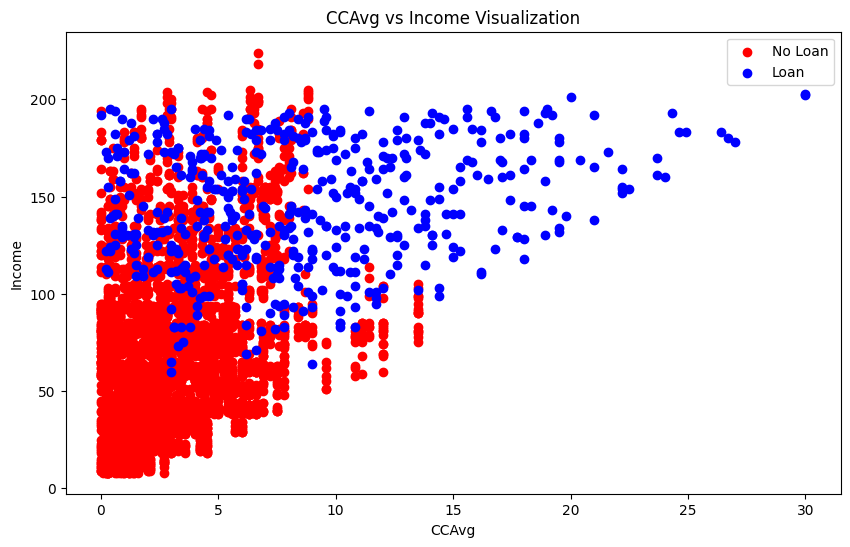

In [49]:
df['CCAvg'] = df['CCAvg'] * df['Education']

# Selecting 'CCAvg' and 'Income' for visualization and SVM
X = df[['CCAvg', 'Income']]
y = df['Personal Loan']

# Visualizing the data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0]['CCAvg'], X[y == 0]['Income'], color='red', label='No Loan')
plt.scatter(X[y == 1]['CCAvg'], X[y == 1]['Income'], color='blue', label='Loan')
plt.xlabel('CCAvg')
plt.ylabel('Income')
plt.title('CCAvg vs Income Visualization')
plt.legend()
plt.show()

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [52]:
# Training the SVM model
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [54]:
h = .02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

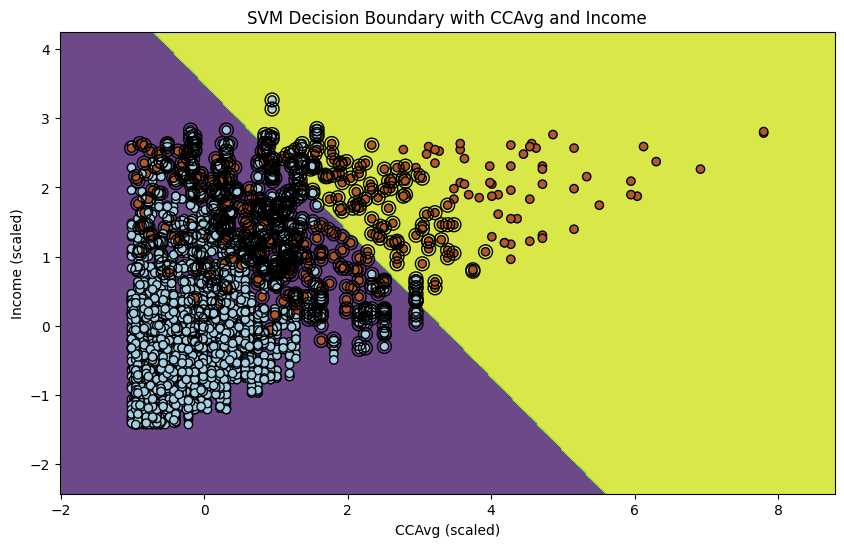

In [60]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('CCAvg (scaled)')
plt.ylabel('Income (scaled)')
plt.title('SVM Decision Boundary with CCAvg and Income')
plt.show()